In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Samdure\Downloads\Bank Customer Churn Prediction.csv")

In [3]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.shape

(10000, 12)

In [7]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [10]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [11]:
df.nunique().count()

12

In [12]:
df.isnull().values.sum()

0

In [13]:
df.isnull()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [15]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [16]:
print(df.columns)

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')


In [17]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [18]:
(df.isnull().sum()/(len(df)))*100              #percentage of missing values in each row

customer_id         0.0
credit_score        0.0
country             0.0
gender              0.0
age                 0.0
tenure              0.0
balance             0.0
products_number     0.0
credit_card         0.0
active_member       0.0
estimated_salary    0.0
churn               0.0
dtype: float64

In [19]:
df.corr

<bound method DataFrame.corr of       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  esti

<Axes: >

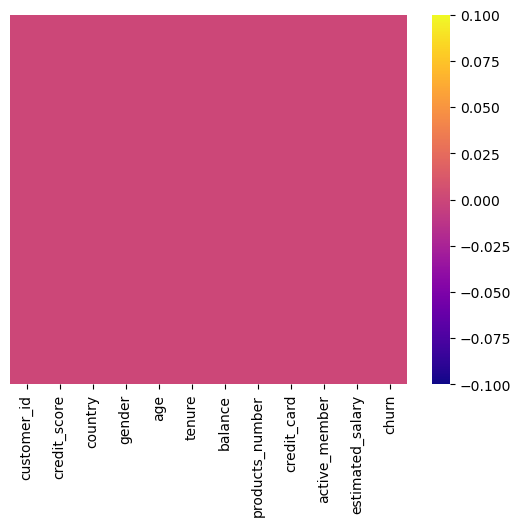

In [20]:
sn.heatmap(df.isnull(), yticklabels=False, cmap="plasma")

<Axes: xlabel='active_member', ylabel='Density'>

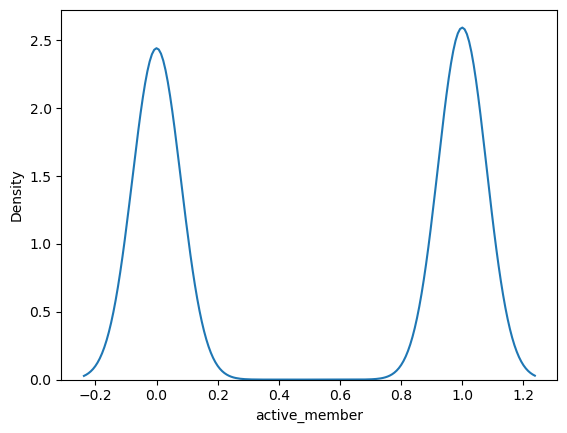

In [21]:
sn.kdeplot(x='active_member', data=df)

<Axes: xlabel='credit_score', ylabel='Proportion'>

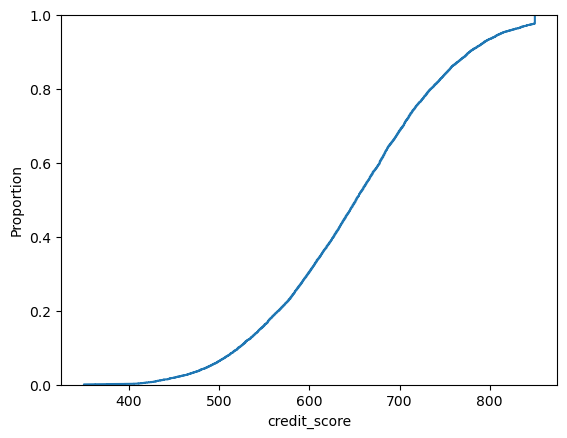

In [22]:
sn.ecdfplot(x='credit_score', data=df)

<Axes: xlabel='credit_card', ylabel='Proportion'>

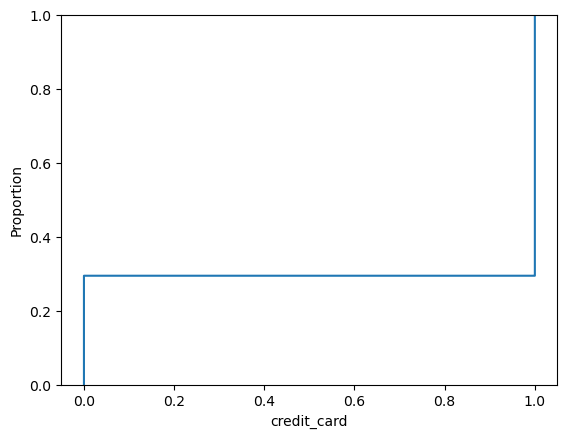

In [23]:
sn.ecdfplot(x='credit_card', data=df)

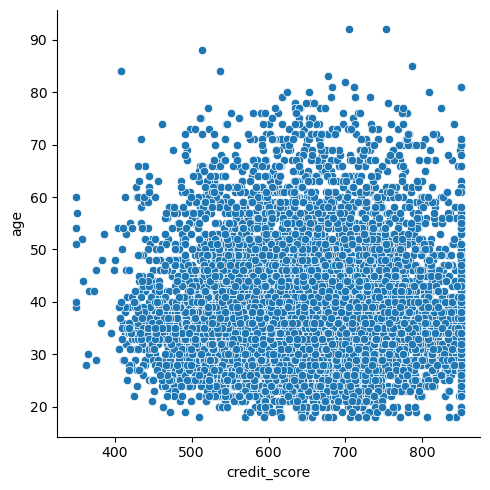

In [24]:
sn.relplot(x='credit_score', y='age', data=df)

<Axes: xlabel='age'>

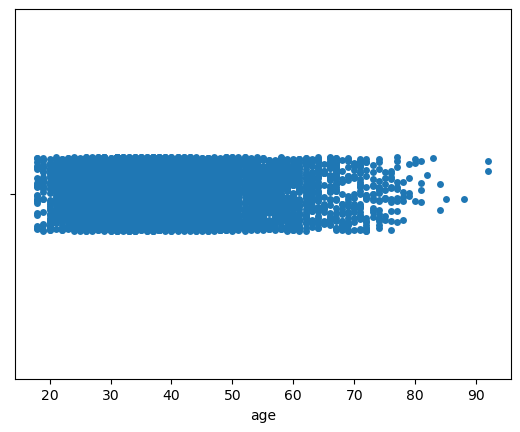

In [25]:
sn.stripplot(x='age', data=df)

<Axes: xlabel='credit_card', ylabel='age'>

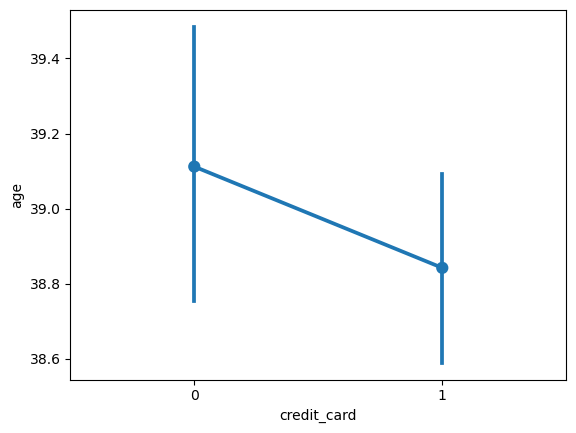

In [26]:
sn.pointplot(x='credit_card', y='age',data=df)

<Axes: >

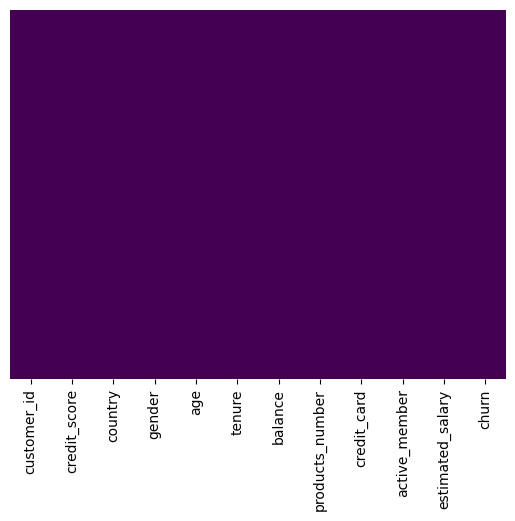

In [27]:
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='active_member', ylabel='age'>

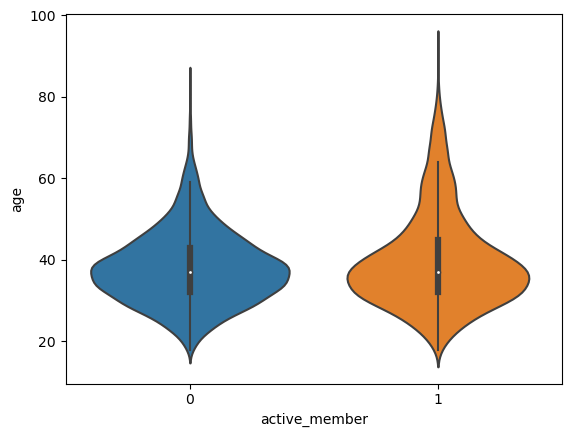

In [28]:
sn.violinplot(x='active_member', y='age', data=df)

<Axes: xlabel='churn', ylabel='count'>

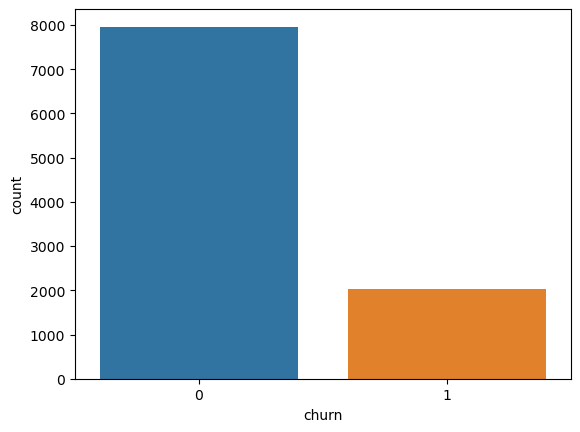

In [29]:
sn.countplot(x='churn', data=df)

<Axes: xlabel='age', ylabel='credit_score'>

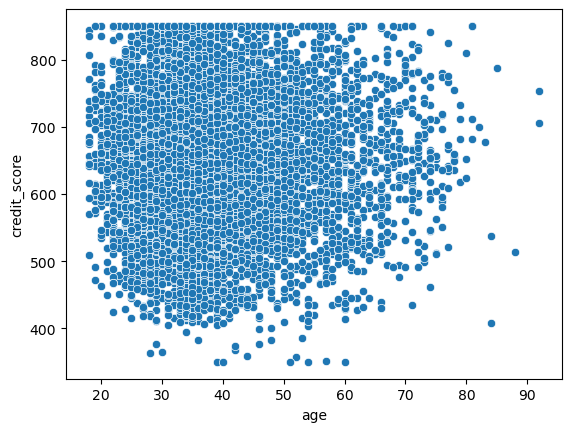

In [30]:
sn.scatterplot(x='age', y='credit_score', data=df)

<Axes: xlabel='credit_card', ylabel='age'>

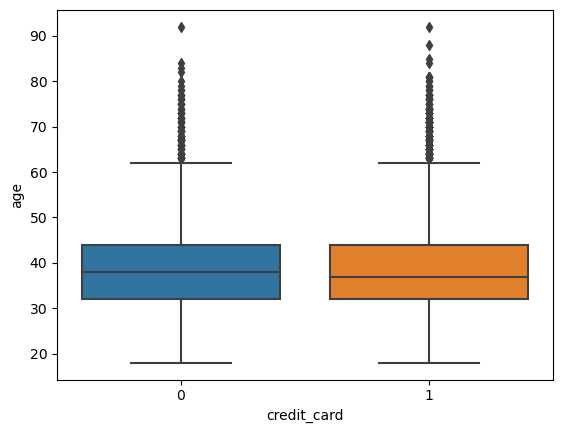

In [31]:
sn.boxplot(y="age", x="credit_card", data=df)

In [32]:
a = df.groupby('age')['age'].count()

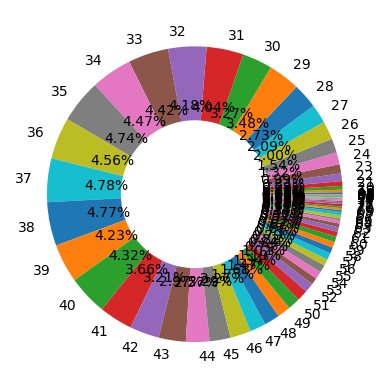

In [33]:
pl.pie(a, labels=a.index, autopct='%.2f%%', wedgeprops=dict(width=0.5))
pl.show()

<Axes: xlabel='age', ylabel='Count'>

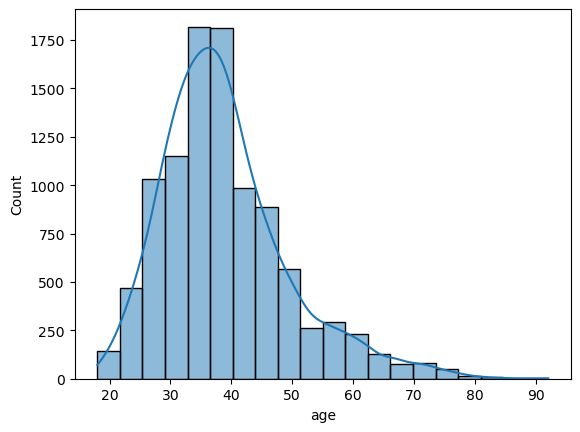

In [34]:
sn.histplot(df['age'], bins=20, kde=True)

<Axes: xlabel='churn', ylabel='age'>

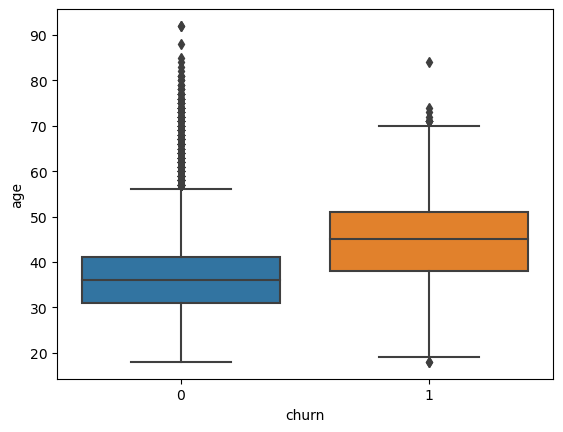

In [35]:
sn.boxplot(y="age", x="churn", data=df)

In [36]:
b = df.groupby('churn')['churn'].count()

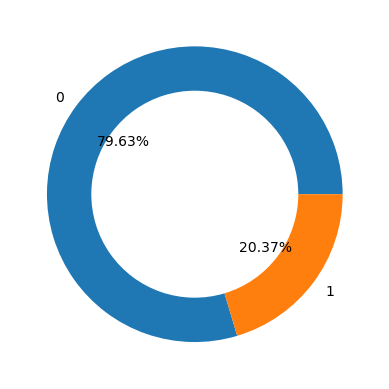

In [37]:
pl.pie(b, labels=b.index, autopct='%.2f%%', wedgeprops=dict(width=0.3))
pl.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '5

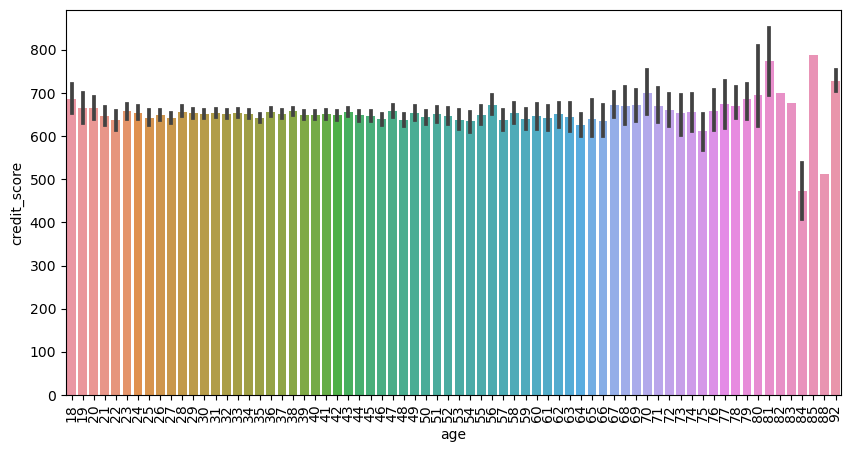

In [38]:
pl.figure(figsize=(10,5))
sn.barplot(y="credit_score", x='age', data=df) 
pl.xticks(rotation=90)

In [39]:
l = df.groupby('churn')['churn'].count()

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

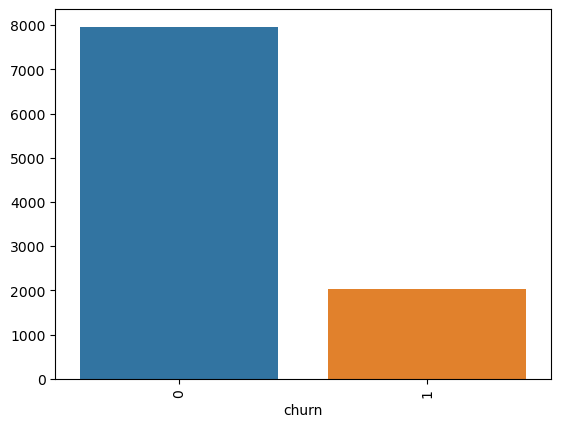

In [40]:
sn.barplot(x=l.index, y=l.values)
pl.xticks(rotation=90)

In [41]:
k = df.groupby('active_member')['active_member'].count()

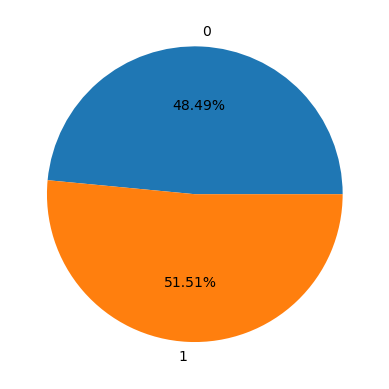

In [42]:
pl.pie(k, labels=k.index, autopct='%.2f%%')
pl.show()

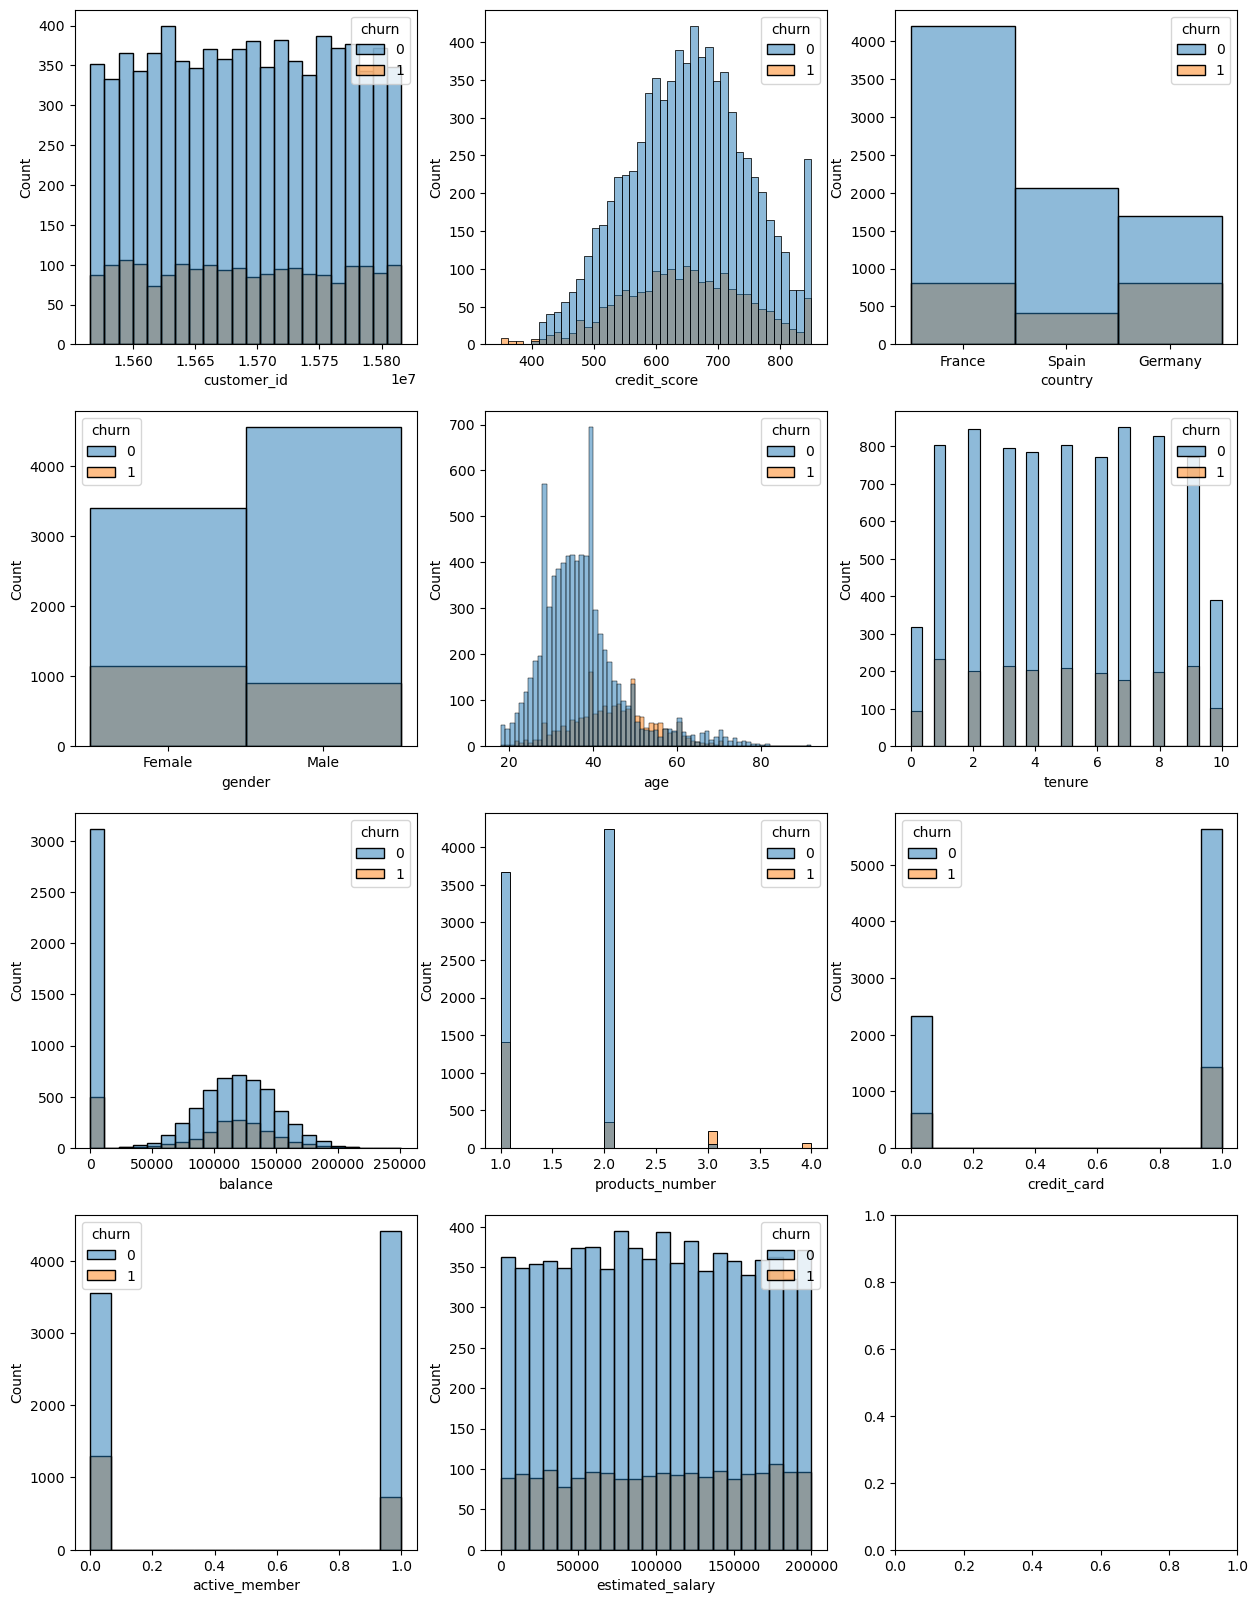

In [43]:
fig, axs = pl.subplots(nrows=4, ncols=3, figsize=(15,20))
axs=axs.flat
for i in range(len(df.columns)-1):
    sn.histplot(data=df, x=df.columns[i],hue="churn",ax=axs[i])

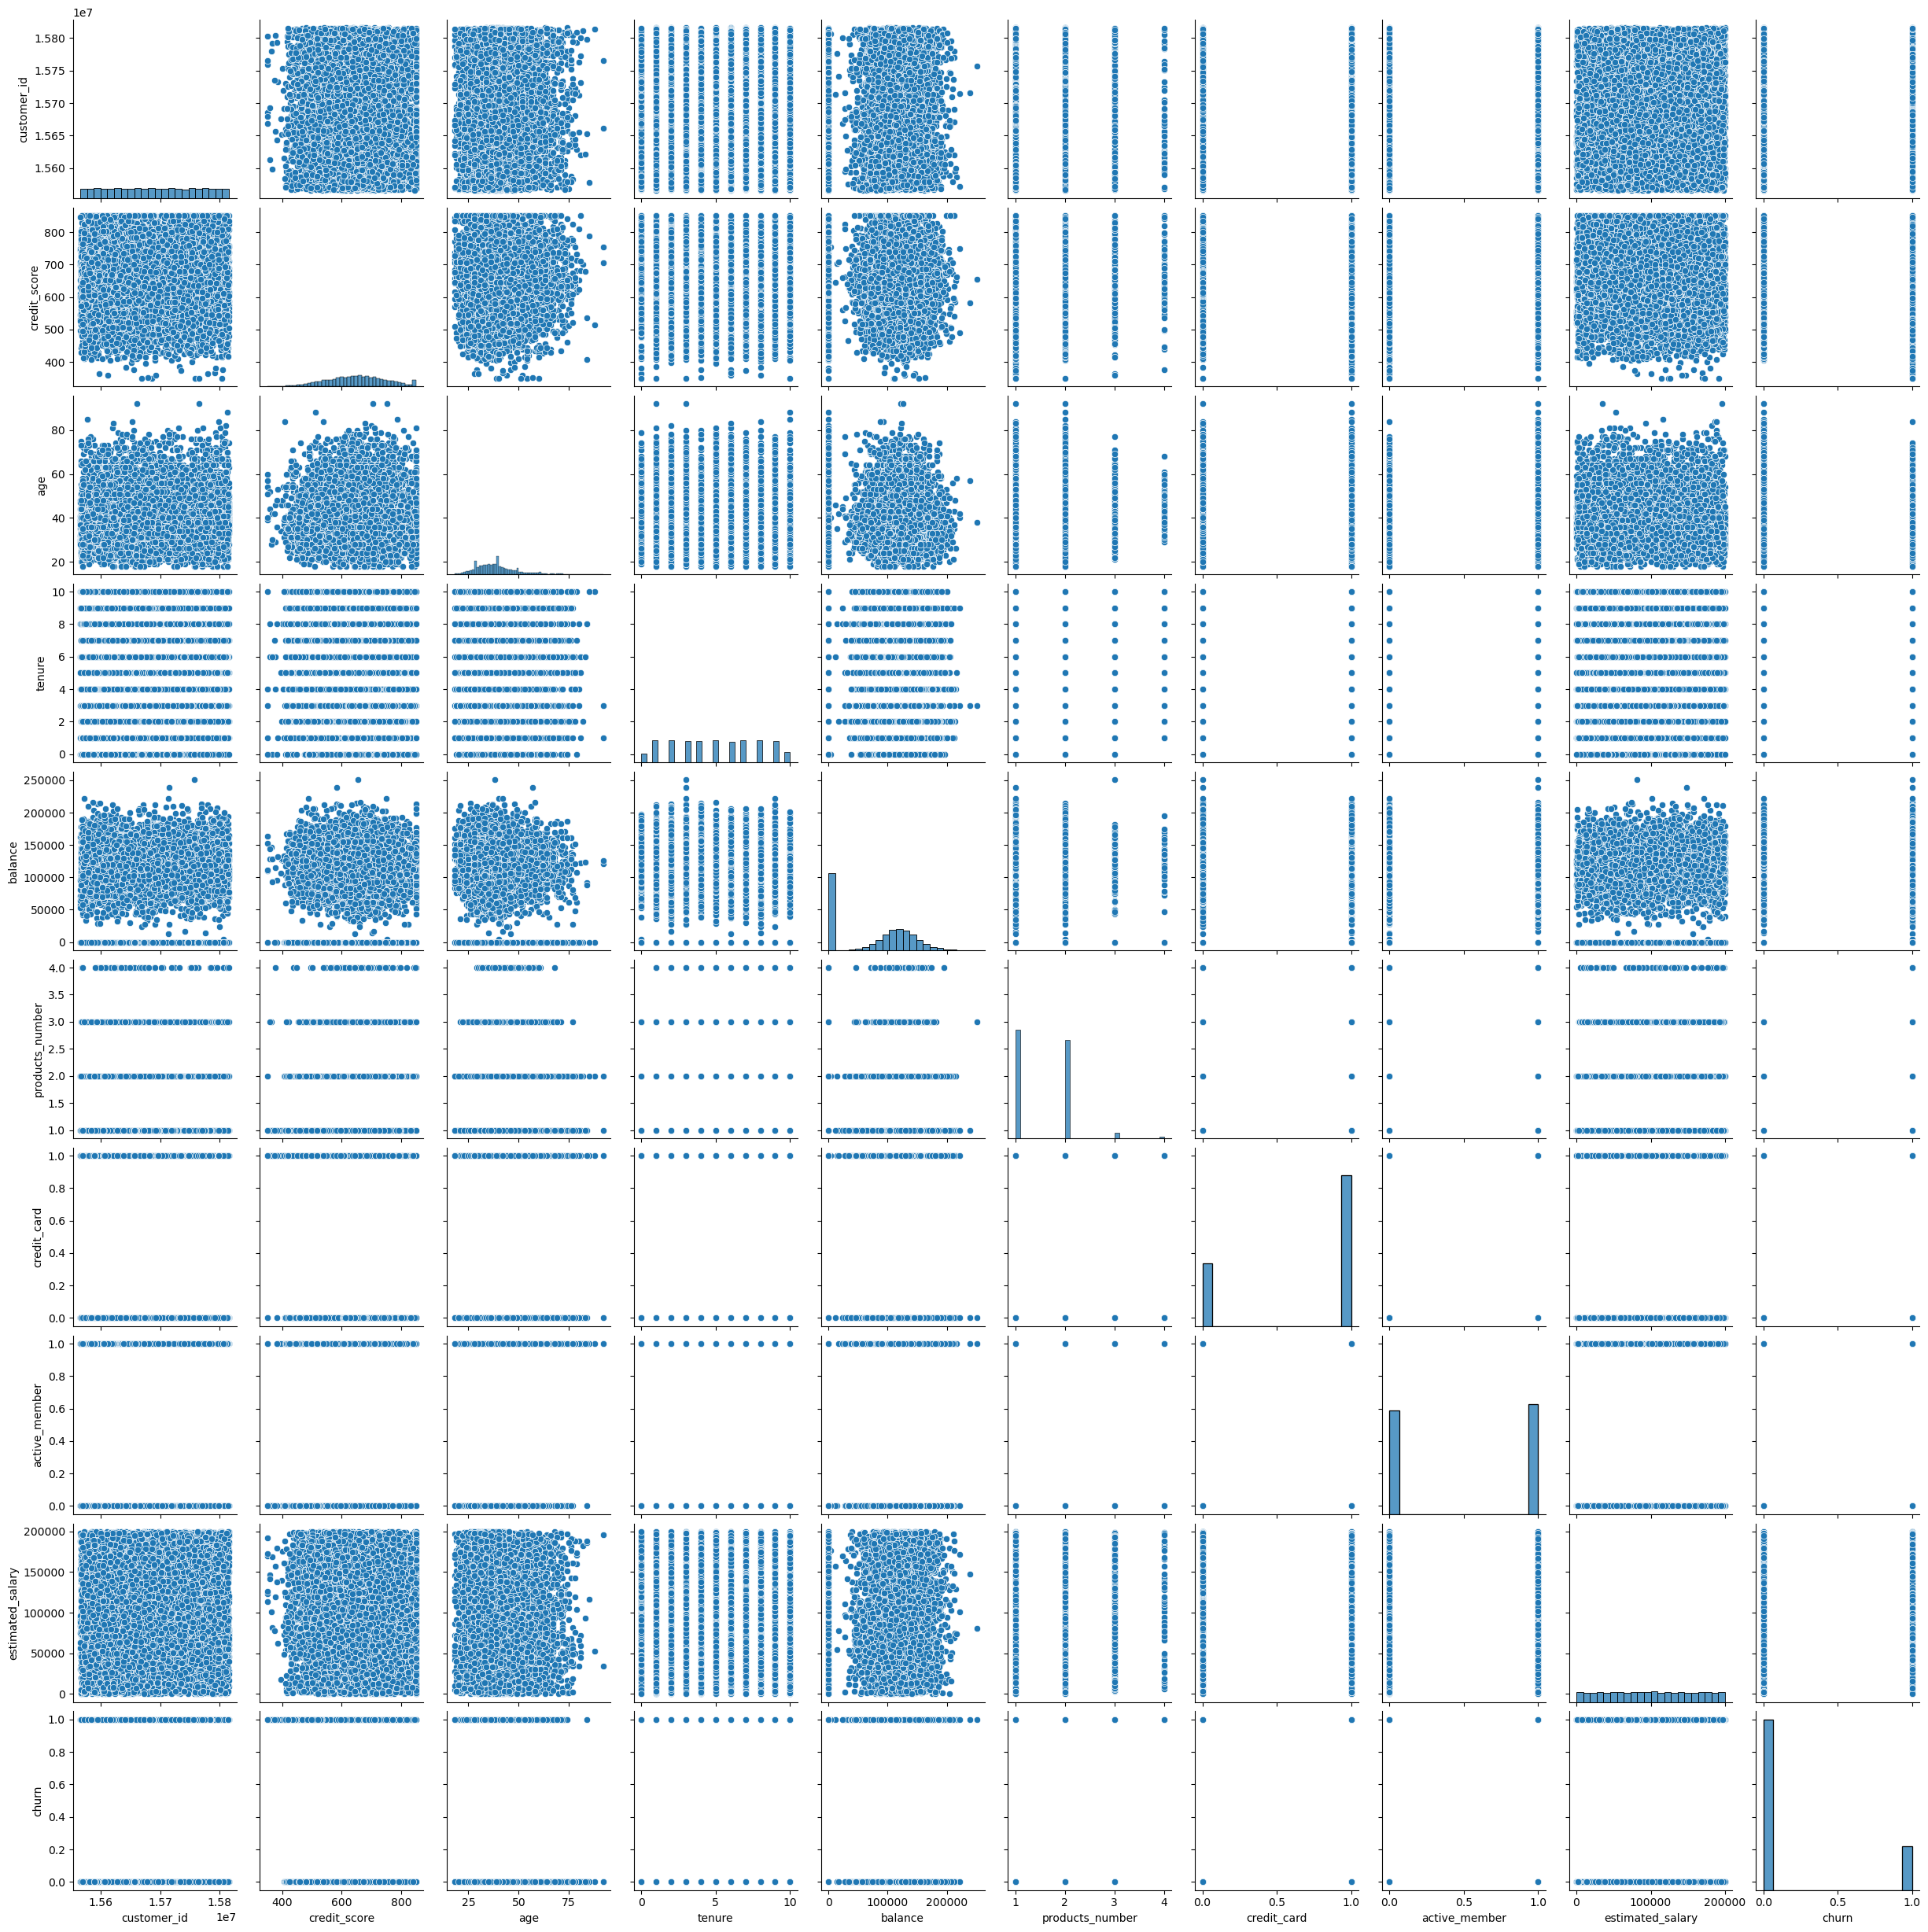

In [44]:
sn.pairplot(df)

In [45]:
# The "country" column is a categorical feature. Let's create some dummies to replace the column
country=pd.get_dummies(df["country"],dtype=int)
df=pd.concat([df,country],axis=1)
df.drop("country",axis=1,inplace=True)
df.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [46]:
#Transform the gender column into a binary column and rename it.
df.rename(columns={"gender":"male"},inplace=True)
df.replace({"Female":0,"Male":1},inplace=True)

In [47]:
#We can't use the customer_id for our ML model
df.drop("customer_id",axis=1,inplace=True)

<Axes: >

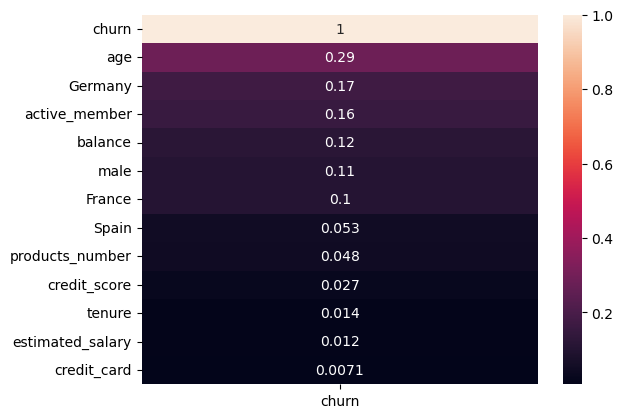

In [48]:
#Now let's analyse the correlation of each feature with our target value "churn"
corr=df.corr()["churn"]
corr=corr.abs().sort_values(ascending=False)
sn.heatmap(data=corr.to_frame(),annot=True)

In [49]:
#In order to avoid overfitting, we should remove all columns that do not have a significant correlation with our target value (churn).
#Therefore, I ll remove all features with a correlation lower than 0.04.
df_model=df.drop(columns=["credit_score","tenure","estimated_salary","credit_card"])

In [51]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Logistic Regression

In [52]:
X=df.drop("churn",axis=1).to_numpy()
y=df["churn"].to_numpy()

In [53]:
#Using the standard scaler for our features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.33, random_state=42)

In [55]:
model=LogisticRegression(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [56]:
print('Train Score : ', model.score(X_train, y_train))

Train Score :  0.8097014925373134


In [57]:
print('Test Score : ', model.score(X_test, y_test))

Test Score :  0.8115151515151515


In [58]:
pred_train = model.predict(X_train)
print(X_train)

[[ 1.68105307 -1.09598752 -0.94607926 ... -1.00280393  1.72790383
  -0.57380915]
 [ 0.31527867  0.91241915 -0.18325053 ... -1.00280393  1.72790383
  -0.57380915]
 [-0.08824558  0.91241915  0.96099256 ... -1.00280393  1.72790383
  -0.57380915]
 ...
 [ 0.87400456 -1.09598752 -0.08789694 ...  0.99720391 -0.57873591
  -0.57380915]
 [ 0.17042381  0.91241915  0.38887101 ...  0.99720391 -0.57873591
  -0.57380915]
 [ 0.48082708  0.91241915  1.15169974 ... -1.00280393  1.72790383
  -0.57380915]]


In [59]:
pred_test = model.predict(X_test)
print(X_test)

[[-0.56419726  0.91241915 -0.66001848 ... -1.00280393  1.72790383
  -0.57380915]
 [-0.28483432  0.91241915  0.38887101 ...  0.99720391 -0.57873591
  -0.57380915]
 [-0.51246338 -1.09598752  0.4842246  ... -1.00280393 -0.57873591
   1.74273971]
 ...
 [-0.63662469 -1.09598752 -0.75537207 ...  0.99720391 -0.57873591
  -0.57380915]
 [-2.19898783  0.91241915  2.00988206 ...  0.99720391 -0.57873591
  -0.57380915]
 [ 0.56360129 -1.09598752  0.67493179 ... -1.00280393  1.72790383
  -0.57380915]]


In [60]:
confusion_matrix(y_test,y_pred)

array([[2545,  112],
       [ 510,  133]], dtype=int64)

In [61]:
accuracy_score(y_test,y_pred)

0.8115151515151515

In [62]:
#Let's also perform a classification report
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2657
           1       0.54      0.21      0.30       643

    accuracy                           0.81      3300
   macro avg       0.69      0.58      0.60      3300
weighted avg       0.78      0.81      0.78      3300



In [63]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5306
           1       0.62      0.22      0.33      1394

    accuracy                           0.81      6700
   macro avg       0.72      0.59      0.61      6700
weighted avg       0.78      0.81      0.77      6700



In [64]:
#Now, let's see if we can get a better result using LogisiticRegressionCV
model_cv=LogisticRegressionCV(random_state=42)
model_cv.fit(X_train,y_train)
y_pred_cv=model_cv.predict(X_test)

In [65]:
model_cv.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [66]:
confusion_matrix(y_test,y_pred_cv)

array([[2552,  105],
       [ 514,  129]], dtype=int64)

In [67]:
##The accuracy score has increased slightly
accuracy_score(y_test,y_pred_cv)

0.8124242424242424

In [68]:
print(classification_report(y_test,y_pred_cv))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2657
           1       0.55      0.20      0.29       643

    accuracy                           0.81      3300
   macro avg       0.69      0.58      0.59      3300
weighted avg       0.78      0.81      0.78      3300



## Random Forest Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [70]:
model2=RandomForestClassifier(random_state=42)
model2.fit(X_train,y_train)
y_predict=model2.predict(X_test)

In [71]:
confusion_matrix(y_test,y_predict)

array([[2557,  100],
       [ 336,  307]], dtype=int64)

In [72]:
accuracy_score(y_test,y_predict)

0.8678787878787879

In [73]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2657
           1       0.75      0.48      0.58       643

    accuracy                           0.87      3300
   macro avg       0.82      0.72      0.75      3300
weighted avg       0.86      0.87      0.86      3300



## Parameter Tunning

In [74]:
# The Random Forest performes much better than the Logisitc Regression. Let's see whether or not we can improve the results be doing parameter tuning using random search
# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [75]:
rf_classifier=RandomForestClassifier()
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42)

In [76]:
# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}
Best Accuracy:  0.8617910447761196


In [77]:
y_best_rf=random_search.predict(X_test)

In [78]:
confusion_matrix(y_test,y_best_rf)

array([[2571,   86],
       [ 341,  302]], dtype=int64)

In [79]:
accuracy_score(y_test,y_best_rf)

0.8706060606060606

In [80]:
print(classification_report(y_test,y_best_rf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.78      0.47      0.59       643

    accuracy                           0.87      3300
   macro avg       0.83      0.72      0.75      3300
weighted avg       0.86      0.87      0.86      3300



## Conclusion

<Axes: >

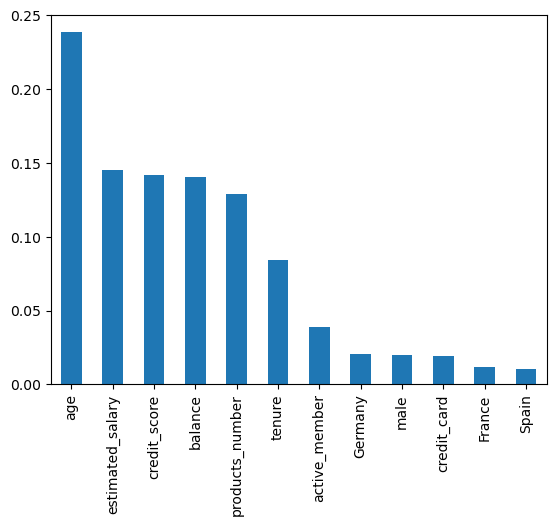

In [81]:
# The performance has not improved, thus model2 performs best. Let's finally take a look on the feature importance.
feature_importance=pd.Series(model2.feature_importances_,index=df.drop("churn",axis=1).columns)
feature_importance.abs().sort_values(ascending=False).plot(kind="bar")